In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tslearn.datasets import UCR_UEA_datasets
import sklearn
import pickle
import numpy as np 
import torch 
from TSInterpret_Artifacts.ClassificationModels.CNN_T import ResNetBaseline, UCRDataset, fit
import warnings
warnings.filterwarnings("ignore") 

from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from tslearn.shapelets import LearningShapelets

import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.transformation import ShapeletTransform

In [10]:
def scale_dataset(traindata, testdata):
    minmaxscaler = MinMaxScaler()
    minmaxscaler.fit(traindata.reshape(-1, 1))

    scaled_traindata = minmaxscaler.transform(traindata.reshape(-1, 1)).reshape(-1, traindata.shape[1], 1)
    scaled_testdata = minmaxscaler.transform(testdata.reshape(-1, 1)).reshape(-1, traindata.shape[1], 1)
    return scaled_traindata, scaled_testdata

In [16]:
# Toy dataset
train_x, test_x, train_y, test_y = load_gunpoint(return_X_y=True)

train_x = train_x.reshape(-1, 150, 1)
test_x = test_x.reshape(-1, 150, 1)

train_x_scaled, test_x_scaled = scale_dataset(train_x, test_x)

train_x_scaled = train_x_scaled.reshape(-1,train_x_scaled.shape[1])
test_x_scaled = test_x_scaled.reshape(-1,test_x_scaled.shape[1])

In [18]:
# Shapelet transformation
model = ShapeletTransform(n_shapelets=2, window_sizes=[12, 24, 36, 48], random_state=42, sort=True)
model.fit(train_x_scaled, train_y)

ShapeletTransform(n_shapelets=2, random_state=42, sort=True,
                  window_sizes=[12, 24, 36, 48])

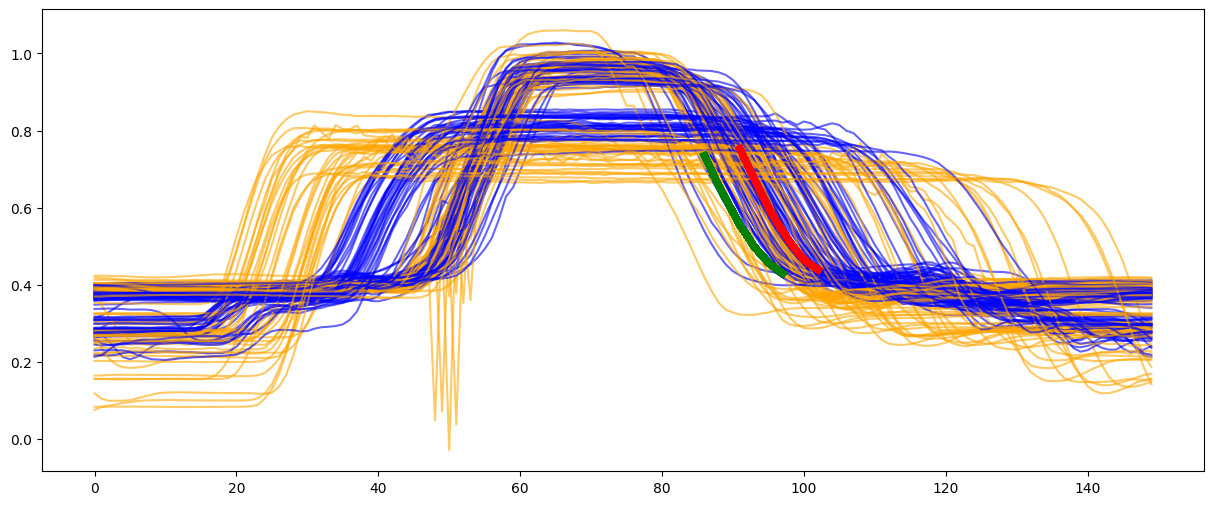

In [21]:
test_dataset = UCRDataset(test_x_scaled.astype(np.float32),test_y.astype(np.float32))

time_axis = np.arange(train_x.shape[1])
fig, ax = plt.subplots(figsize=(15, 6))

colors = ["red", "green", "purple", "black", "yellow"]

for test_ts_id in range(len(test_dataset)):
    input_tensor = test_dataset[test_ts_id][0]
    label = test_dataset[test_ts_id][1]

    # Visualization
    color = 'blue' if label == 1 else 'orange'
    ax.plot(time_axis, input_tensor, label="Input Time Series", color=color, alpha=0.6)

    for i, index in enumerate(model.indices_[:4]):
        idx, start, end = index
        ax.plot(np.arange(start, end), train_x_scaled[idx, start:end], lw=5, color=colors[i])